# Modelos de Deep Learning

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
df = pd.read_csv("https://raw.githubusercontent.com/lihkir/Data/refs/heads/main/Bitcoin%20Historical%20Data.csv", thousands=',', decimal='.')
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date")
df.sort_index(inplace=True)

df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2010-07-18,0.1,0.0,0.1,0.1,0.08K,0.00%
2010-07-19,0.1,0.1,0.1,0.1,0.57K,0.00%
2010-07-20,0.1,0.1,0.1,0.1,0.26K,0.00%
2010-07-21,0.1,0.1,0.1,0.1,0.58K,0.00%
2010-07-22,0.1,0.1,0.1,0.1,2.16K,0.00%
...,...,...,...,...,...,...
2024-03-20,67854.0,62046.8,68029.5,60850.9,133.53K,9.35%
2024-03-21,65503.8,67860.0,68161.7,64616.1,75.26K,-3.46%
2024-03-22,63785.5,65501.5,66633.3,62328.3,72.43K,-2.62%


In [120]:
# retorno acumulado
def retorno_acumulado(df, columna):
    retorno_diario = (df[columna].diff() / df[columna].shift(1))
    return retorno_diario.cumsum()

def volatilidad(retorno_acum, ventana):
    std_w = retorno_acum.rolling(window=ventana).std()
    return std_w


df["DailyReturn"] = retorno_acumulado(df, "Price")
df["Volatility"] =  volatilidad(df["DailyReturn"], 7)

df

,Price,Open,High,Low,Vol.,Change %,DailyReturn,Volatility
Date,,,,,,,,
2010-07-18,0.1,0.0,0.1,0.1,0.08K,0.00%,NaN,NaN
2010-07-19,0.1,0.1,0.1,0.1,0.57K,0.00%,0.000000,NaN
2010-07-20,0.1,0.1,0.1,0.1,0.26K,0.00%,0.000000,NaN
2010-07-21,0.1,0.1,0.1,0.1,0.58K,0.00%,0.000000,NaN
2010-07-22,0.1,0.1,0.1,0.1,2.16K,0.00%,0.000000,NaN
...,...,...,...,...,...,...,...,...
2024-03-20,67854.0,62046.8,68029.5,60850.9,133.53K,9.35%,23.719802,0.043620
2024-03-21,65503.8,67860.0,68161.7,64616.1,75.26K,-3.46%,23.685166,0.036828
2024-03-22,63785.5,65501.5,66633.3,62328.3,72.43K,-2.62%,23.658934,0.034760


In [121]:
timeserie  = df["Price"]

## Split de datos

In [122]:
def split_time_series(data, tau, train_size=7, jump=0):
    """
    train_size:
    tau:
    """
    n_samples = len(data)
    
    dim_train_size = 14
    dim_tau_size = 7
    total_dim = dim_train_size + dim_tau_size * 2

    splits = []
    id_counter = 1
    dim = 1
    split_counter = 0

    for start in range(0, n_samples - train_size - tau*2 + jump, 1):
        if split_counter == 0:
            if start + total_dim > n_samples - train_size - tau * 2 + jump:
                break  # No hay suficientes datos

        x_train_end = start + train_size + jump
        y_tain = x_train_end + tau

        if split_counter < dim_train_size:
            split_type  = "train"
        elif split_counter < dim_train_size + dim_tau_size:
            split_type  = "val"
        elif split_counter < dim_train_size + dim_tau_size*2:
            split_type  = "test"
        else:
            # Reset
            dim += 1
            split_counter = 0
            split_type = "train"
        
        split_dict = {
            "id": id_counter,
            "dim": dim,
            "split": split_type,
            "X": [data.iloc[start:x_train_end]],  
            "y": [data.iloc[x_train_end:y_tain]]
        }

        splits.append(split_dict)

        # Incrementar los contadores
        id_counter += 1
        split_counter += 1

        if split_counter >= total_dim:
            dim += 1
            split_counter = 0

    return splits

array = split_time_series(data=timeserie, tau=1)
df_model = pd.DataFrame(array)

In [123]:
df_model.head(-5)

,id,dim,split,X,y
0,1,1,train,"[[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]]",[[0.1]]
1,2,1,train,"[[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]]",[[0.1]]
2,3,1,train,"[[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]]",[[0.1]]
3,4,1,train,"[[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]]",[[0.1]]
4,5,1,train,"[[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]]",[[0.1]]
...,...,...,...,...,...
4974,4975,178,val,"[[61169.3, 62397.7, 61994.5, 63135.8, 68270.1,...",[[66855.3]]
4975,4976,178,val,"[[62397.7, 61994.5, 63135.8, 68270.1, 63792.6,...",[[68172.0]]
4976,4977,178,val,"[[61994.5, 63135.8, 68270.1, 63792.6, 66080.4,...",[[68366.5]]
4977,4978,178,test,"[[63135.8, 68270.1, 63792.6, 66080.4, 66855.3,...",[[68964.8]]


In [124]:
## PENDIENTE
def plot_splits(data, splits, horizon, dim=1):
    return 1

## Entrenamiento y validación

In [125]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, root_mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [126]:
devices = tf.config.list_physical_devices()
print("Available devices:")
for device in devices:
    print(device)

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("TensorFlow is using GPU.")
    for gpu in gpus:
        gpu_details = tf.config.experimental.get_device_details(gpu)
        print(f"GPU details: {gpu_details}")
else:
    print("TensorFlow is not using GPU.")

Available devices:
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
TensorFlow is using GPU.
GPU details: {'device_name': 'NVIDIA GeForce RTX 2060 SUPER', 'compute_capability': (7, 5)}


In [127]:
dim = 60

df_dim = df_model.loc[df_model["dim"] == dim]

split = "train"
X_train, y_train = df_dim.loc[df_dim["split"] == split, "X"].tolist(), df_dim.loc[df_dim["split"] == split, "y"].tolist()
X_train, y_train = np.array([np.array(xi).flatten() for xi in X_train]), np.array([np.array(yi).flatten() for yi in y_train])


split = "val"
X_val, y_val = df_dim.loc[df_dim["split"] == split, "X"].tolist(), df_dim.loc[df_dim["split"] == split, "y"].tolist()
X_val, y_val = np.array([np.array(xi).flatten() for xi in X_val]), np.array([np.array(yi).flatten() for yi in y_val])

split = "test"
X_test, y_test = df_dim.loc[df_dim["split"] == split, "X"].tolist(), df_dim.loc[df_dim["split"] == split, "y"].tolist()
X_test, y_test = np.array([np.array(xi).flatten() for xi in X_test]), np.array([np.array(yi).flatten() for yi in y_test])

# Re-dimensionar los datos para RNN/LSTM
X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val_rnn = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


#pendiente llevarlo a función
def get_batch(df, dim):
    dim_df = df_model.loc[df_model["dim"] == 100]

    # return X_train, y_train, X_val, y_val

X_train

array([[252.1, 269.2, 263.3, 236.2, 234. , 231.8, 218.5],
       [269.2, 263.3, 236.2, 234. , 231.8, 218.5, 225.3],
       [263.3, 236.2, 234. , 231.8, 218.5, 225.3, 238.9],
       [236.2, 234. , 231.8, 218.5, 225.3, 238.9, 227.4],
       [234. , 231.8, 218.5, 225.3, 238.9, 227.4, 226.6],
       [231.8, 218.5, 225.3, 238.9, 227.4, 226.6, 216.5],
       [218.5, 225.3, 238.9, 227.4, 226.6, 216.5, 223. ],
       [225.3, 238.9, 227.4, 226.6, 216.5, 223. , 227.7],
       [238.9, 227.4, 226.6, 216.5, 223. , 227.7, 223.7],
       [227.4, 226.6, 216.5, 223. , 227.7, 223.7, 220.3],
       [226.6, 216.5, 223. , 227.7, 223.7, 220.3, 219.7],
       [216.5, 223. , 227.7, 223.7, 220.3, 219.7, 218.8],
       [223. , 227.7, 223.7, 220.3, 219.7, 218.8, 221.8],
       [227.7, 223.7, 220.3, 219.7, 218.8, 221.8, 236.2]])

In [128]:
def calculate_metrics(y_true, y_pred):
    rmse = root_mean_squared_error(y_true, y_pred)
    metrics = {
        "MAPE": mean_absolute_percentage_error(y_true, y_pred),
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": rmse,
        "MSE": rmse**2,
        "R2": r2_score(y_true, y_pred)
    }
    return metrics


def create_and_train_model(model_type, neurons, dropout_rate, batch_size, X_train, y_train, X_val, y_val):
    
    
    model = Sequential()
    if model_type == 'MLP':
        # (samples, features)
        model.add(Dense(neurons, activation='relu', input_shape=(X_train.shape[1],)))
        model.add(Dropout(dropout_rate))
        model.add(Dense(1))

    elif model_type == 'RNN':
        #(samples, timesteps, features)
        model.add(SimpleRNN(neurons, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))
        model.add(Dropout(dropout_rate))
        model.add(Dense(1))

    elif model_type == 'LSTM':
        #(samples, timesteps, features)
        model.add(LSTM(neurons, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))
        model.add(Dropout(dropout_rate))
        model.add(Dense(1))

    else:
        raise ValueError("Modeo inválido")

    model.compile(optimizer=Adam(), loss='mse', metrics=['mape','mae', 'mse'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint(f'models/best_model_{model_type}.h5', save_best_only=True, monitor='val_loss')

    history = model.fit(X_train, y_train, epochs=500, batch_size=batch_size,
                        validation_data=(X_val, y_val), verbose=1,
                        callbacks=[early_stopping, model_checkpoint])
    return model, history

In [129]:
model_type = 'MLP'
neurons = 1000
dropout_rate = 0.2
batch_size = 16

model_mlp, history_mlp = create_and_train_model(model_type, neurons, dropout_rate, batch_size,
                                                X_train, y_train, X_val, y_val)


Epoch 1/500
1/1 [==============================] - 1s 516ms/step - loss: 55169.4922 - mape: 102.7983 - mae: 234.0363 - mse: 55169.4922 - val_loss: 43985.8203 - val_mape: 87.4635 - val_mae: 209.6957 - val_mse: 43985.8203
Epoch 2/500
1/1 [==============================] - 0s 52ms/step - loss: 40312.3086 - mape: 87.8383 - mae: 199.8987 - mse: 40312.3086 - val_loss: 29661.2500 - val_mape: 71.8221 - val_mae: 172.1961 - val_mse: 29661.2500
Epoch 3/500
1/1 [==============================] - 0s 54ms/step - loss: 26591.6465 - mape: 71.1793 - mae: 162.2079 - mse: 26591.6465 - val_loss: 18386.6309 - val_mape: 56.5440 - val_mae: 135.5691 - val_mse: 18386.6309
Epoch 4/500
1/1 [==============================] - 0s 56ms/step - loss: 16136.4062 - mape: 55.2873 - mae: 126.0200 - mse: 16136.4062 - val_loss: 10038.0420 - val_mape: 41.7732 - val_mae: 100.1576 - val_mse: 10038.0420
Epoch 5/500
1/1 [==============================] - 0s 67ms/step - loss: 8996.0049 - mape: 41.2015 - mae: 93.9179 - mse: 8996.0

In [130]:
model_type = 'RNN'
model_rnn, history_rnn = create_and_train_model(model_type, neurons, dropout_rate, batch_size,
                                                X_train_rnn, y_train, X_val_rnn, y_val)

Epoch 1/500
1/1 [==============================] - 1s 988ms/step - loss: 51249.9570 - mape: 99.4305 - mae: 226.1553 - mse: 51249.9570 - val_loss: 55527.1328 - val_mape: 98.2658 - val_mae: 235.6003 - val_mse: 55527.1328
Epoch 2/500
1/1 [==============================] - 0s 78ms/step - loss: 49856.3477 - mape: 98.0456 - mae: 223.0312 - mse: 49856.3477 - val_loss: 54206.6250 - val_mape: 97.0898 - val_mae: 232.7813 - val_mse: 54206.6250
Epoch 3/500
1/1 [==============================] - 0s 106ms/step - loss: 48675.0547 - mape: 96.8729 - mae: 220.3681 - mse: 48675.0547 - val_loss: 52968.3945 - val_mape: 95.9739 - val_mae: 230.1066 - val_mse: 52968.3945
Epoch 4/500
1/1 [==============================] - 0s 78ms/step - loss: 47454.2305 - mape: 95.6391 - mae: 217.5728 - mse: 47454.2305 - val_loss: 51842.0312 - val_mape: 94.9472 - val_mae: 227.6459 - val_mse: 51842.0312
Epoch 5/500
1/1 [==============================] - 0s 79ms/step - loss: 46393.1445 - mape: 94.5660 - mae: 215.1301 - mse: 4639

In [131]:
model_type = 'LSTM'
model_lstm, history_lstm = create_and_train_model(model_type, neurons, dropout_rate, batch_size,
                                                  X_train_rnn, y_train, X_val_rnn, y_val)

Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 52147.1523 - mape: 100.2882 - mae: 228.1162 - mse: 52147.1523 - val_loss: 56865.8203 - val_mape: 99.4438 - val_mae: 238.4241 - val_mse: 56865.8203
Epoch 2/500
1/1 [==============================] - 0s 294ms/step - loss: 51213.0664 - mape: 99.3808 - mae: 226.0581 - mse: 51213.0664 - val_loss: 56092.2852 - val_mape: 98.7647 - val_mae: 236.7963 - val_mse: 56092.2852
Epoch 3/500
1/1 [==============================] - 0s 124ms/step - loss: 50477.2539 - mape: 98.6622 - mae: 224.4255 - mse: 50477.2539 - val_loss: 55385.0508 - val_mape: 98.1396 - val_mae: 235.2982 - val_mse: 55385.0508
Epoch 4/500
1/1 [==============================] - 0s 125ms/step - loss: 49828.5234 - mape: 98.0172 - mae: 222.9684 - mse: 49828.5234 - val_loss: 54698.6680 - val_mape: 97.5292 - val_mae: 233.8352 - val_mse: 54698.6680
Epoch 5/500
1/1 [==============================] - 0s 119ms/step - loss: 49073.1953 - mape: 97.2762 - mae: 221.2775 - mse: 490

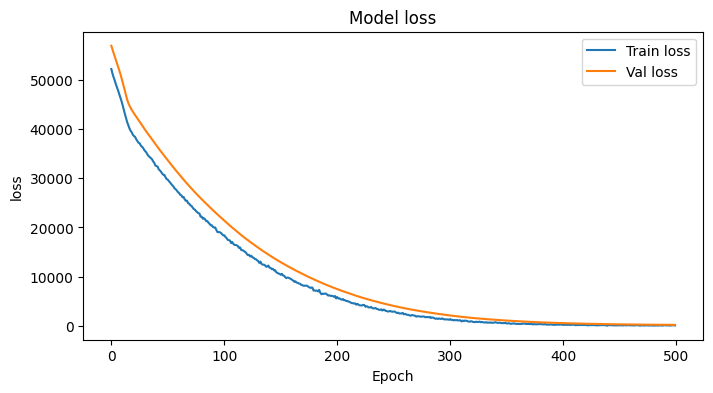

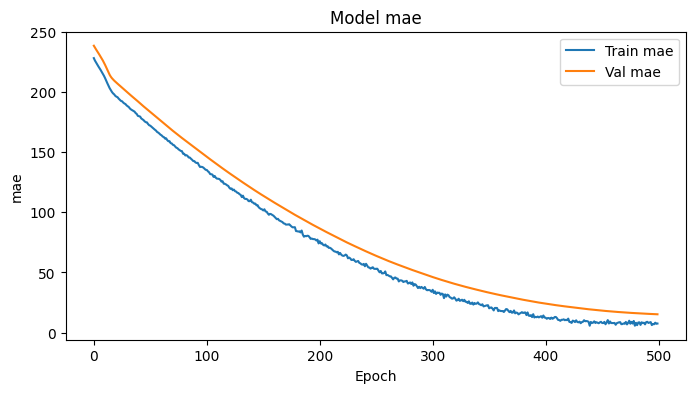

In [132]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Métricas disponibles en history.history
    metrics = ['loss', 'mae']
    for metric in metrics:
        plt.figure(figsize=(8, 4))
        plt.plot(history.history[metric], label=f'Train {metric}')
        plt.plot(history.history[f'val_{metric}'], label=f'Val {metric}')
        plt.title(f'Model {metric}')
        plt.ylabel(metric)
        plt.xlabel('Epoch')
        plt.legend()
        plt.show()

# Ejemplo para el modelo LSTM
plot_training_history(history_lstm)


In [133]:
# Seleccionar el modelo y los datos correspondientes
model = model_lstm  # o model_mlp, model_rnn
X_test_model = X_test if model_type == 'MLP' else X_test_rnn

# Realizar predicciones
y_pred = model.predict(X_test_model)
y_true = y_test

# Calcular métricas
metrics = calculate_metrics(y_true, y_pred)
print("Resultados de las métricas:")
for metric_name, metric_value in metrics.items():
    print(f"{metric_name}: {metric_value}")


1/1 [==============================] - 0s 298ms/step
Resultados de las métricas:
MAPE: 0.07181816978864013
MAE: 17.596387154715405
RMSE: 19.115734077856814
MSE: 365.4112893353363
R2: -5.551129169172268


In [134]:

# Hiperparámetros a explorar
dropout_rates = [0.2, 0.4, 0.6, 0.8]
neurons_list = [10, 100, 1000, 10000]
batch_sizes = [16, 32, 64, 128]

results = []

